# 合并数据

In [4]:
import pandas as pd
import numpy as np

In [8]:
dict1={'ID':[1,2,3,4,5,6,7,8,9],
       'System':['win10','win10',np.nan,'win10',
                np.nan,np.nan,'win7','win7','win8'],
       'cpu':['i7','i5',np.nan,'i7',np.nan,np.nan,'i5','i5','i3']
}
dict2={'ID':[1,2,3,4,5,6,7,8,9],
       'System':[np.nan,np.nan,'win7',np.nan,
                 'win8','win7',np.nan,np.nan,np.nan
                ],
       'cpu':[np.nan,np.nan,'i3',np.nan,'i7','i5',np.nan,np.nan,np.nan]
}
df1 = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)

df1

,ID,System,cpu
0,1,win10,i7
1,2,win10,i5
2,3,NaN,NaN
3,4,win10,i7
4,5,NaN,NaN
5,6,NaN,NaN
6,7,win7,i5
7,8,win7,i5
8,9,win8,i3


In [10]:
print(pd.concat([df1,df2]))#默认axis=0

   ID System  cpu
0   1  win10   i7
1   2  win10   i5
2   3    NaN  NaN
3   4  win10   i7
4   5    NaN  NaN
5   6    NaN  NaN
6   7   win7   i5
7   8   win7   i5
8   9   win8   i3
0   1    NaN  NaN
1   2    NaN  NaN
2   3   win7   i3
3   4    NaN  NaN
4   5   win8   i7
5   6   win7   i5
6   7    NaN  NaN
7   8    NaN  NaN
8   9    NaN  NaN


In [11]:
df1['tp']=4
print(pd.concat([df1,df2]))#自动给df2添加一列缺失值，join默认为outer，求两表并集

   ID System  cpu   tp
0   1  win10   i7  4.0
1   2  win10   i5  4.0
2   3    NaN  NaN  4.0
3   4  win10   i7  4.0
4   5    NaN  NaN  4.0
5   6    NaN  NaN  4.0
6   7   win7   i5  4.0
7   8   win7   i5  4.0
8   9   win8   i3  4.0
0   1    NaN  NaN  NaN
1   2    NaN  NaN  NaN
2   3   win7   i3  NaN
3   4    NaN  NaN  NaN
4   5   win8   i7  NaN
5   6   win7   i5  NaN
6   7    NaN  NaN  NaN
7   8    NaN  NaN  NaN
8   9    NaN  NaN  NaN


In [13]:
pd.concat([df1,df2],join = 'inner')#求交集

,ID,System,cpu
0,1,win10,i7
1,2,win10,i5
2,3,NaN,NaN
3,4,win10,i7
4,5,NaN,NaN
5,6,NaN,NaN
6,7,win7,i5
7,8,win7,i5
8,9,win8,i3
0,1,NaN,NaN


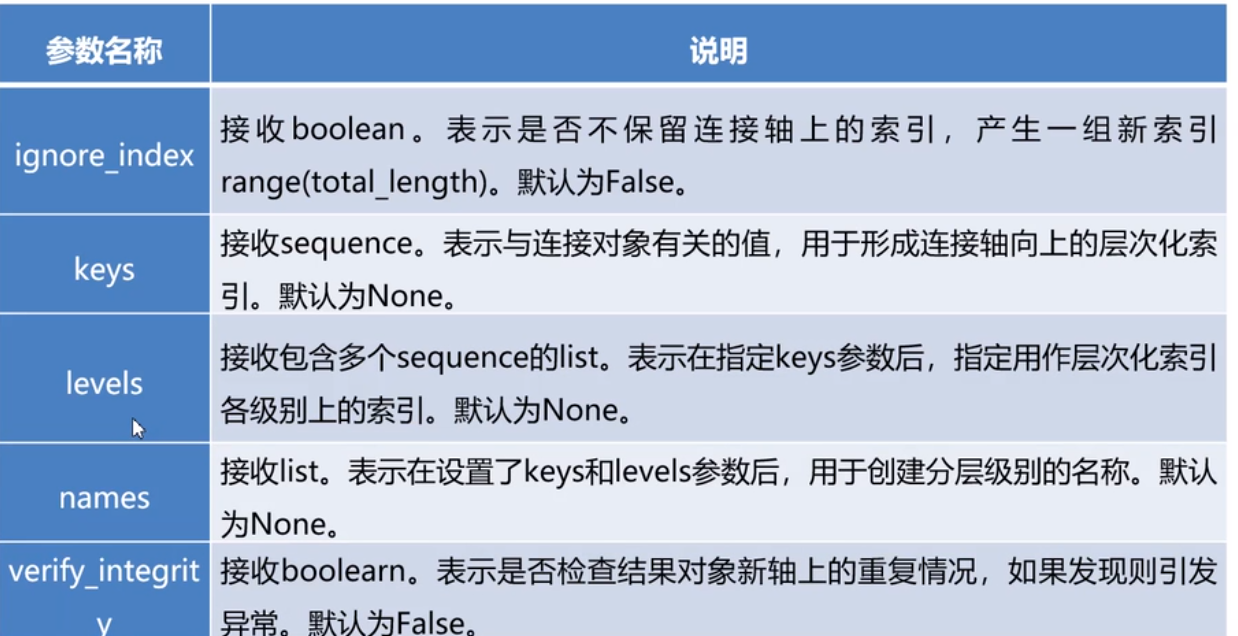

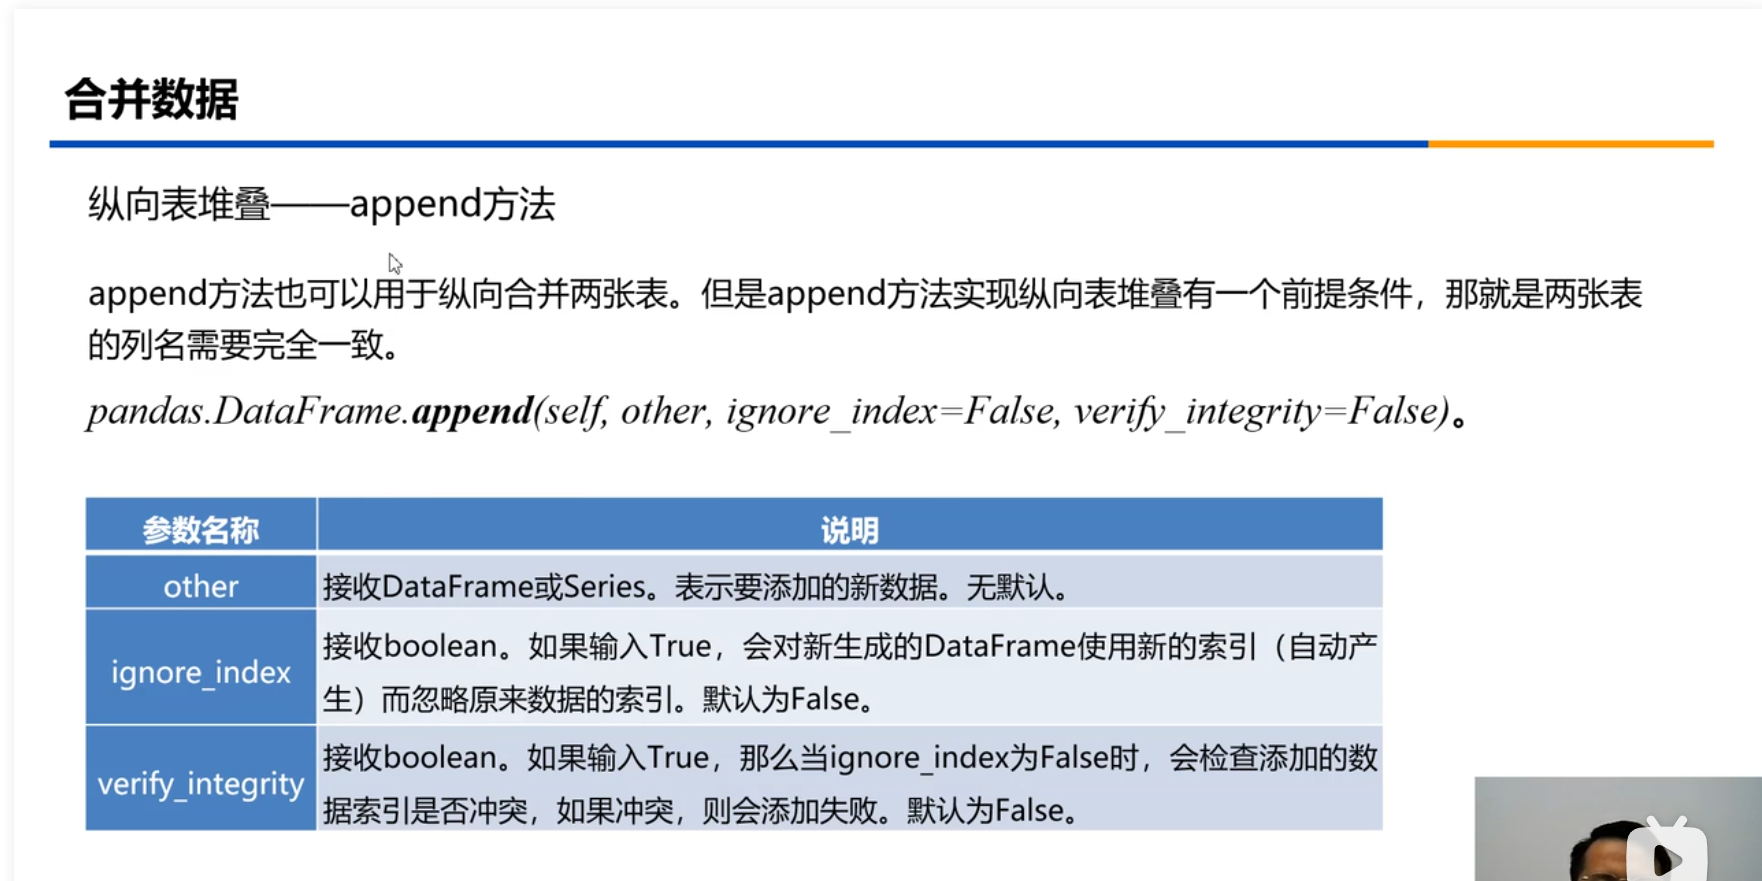

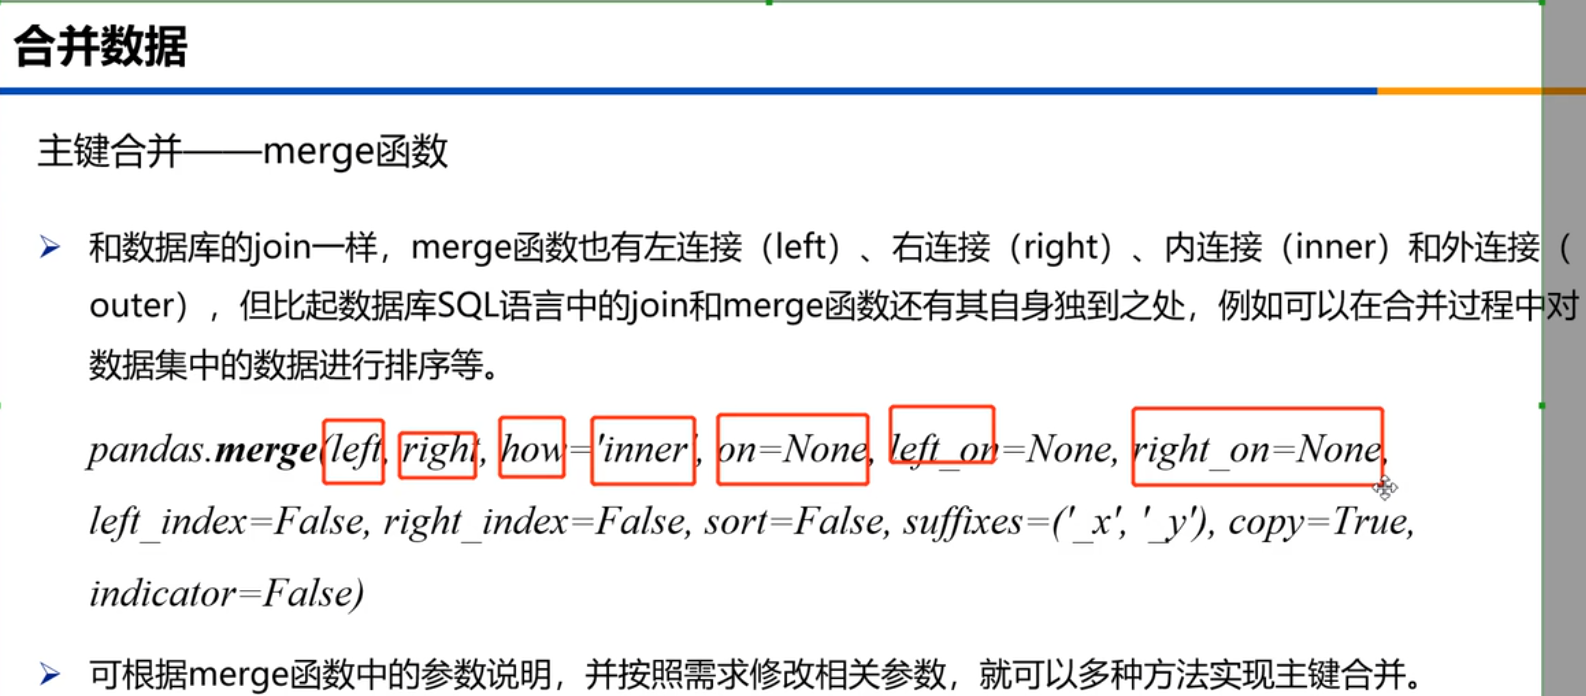

In [18]:
# 重叠合并

dict1={'ID':[1,2,3,4,5,6,7,8,9],
       'System':['win10','win10',np.nan,'win10',
                np.nan,np.nan,'win7','win7','win8'],
       'cpu':['i7','i5',np.nan,'i7',np.nan,np.nan,'i5','i5','i3']
}
dict2={'ID':[1,2,3,4,5,6,7,8,9],
       'System':[np.nan,np.nan,'win7',np.nan,
                 'win8','win7',np.nan,np.nan,np.nan
                ],
       'cpu':[np.nan,np.nan,'i3',np.nan,'i7','i5',np.nan,np.nan,np.nan]
}
df1 = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)

In [23]:
df3 = df1.combine_first(df2)#两表互补相应位置空缺值print()
print(df3)

   ID System cpu
0   1  win10  i7
1   2  win10  i5
2   3   win7  i3
3   4  win10  i7
4   5   win8  i7
5   6   win7  i5
6   7   win7  i5
7   8   win7  i5
8   9   win8  i3


In [26]:
df3.drop_duplicates(subset='System')#subset默认为所有

,ID,System,cpu
0,1,win10,i7
2,3,win7,i3
4,5,win8,i7


In [29]:
df3.drop_duplicates(subset=['System','cpu'])#'System','cpu'都相同才去除

,ID,System,cpu
0,1,win10,i7
1,2,win10,i5
2,3,win7,i3
4,5,win8,i7
5,6,win7,i5
8,9,win8,i3


In [32]:
df3.drop_duplicates(subset=['System','cpu'],keep='last')#重复的取最后一个,默认keep=first

,ID,System,cpu
1,2,win10,i5
2,3,win7,i3
3,4,win10,i7
4,5,win8,i7
7,8,win7,i5
8,9,win8,i3


### 检测和处理缺失值

In [38]:
df3.isnull()#检查列表中每一个值是否为缺失值

,ID,System,cpu
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False


In [40]:
df3.notnull()#检查列表中每一个值是否不是缺失值

,ID,System,cpu
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True


In [48]:
df1

,ID,System,cpu
0,1,win10,i7
1,2,win10,i5
2,3,NaN,NaN
3,4,win10,i7
4,5,NaN,NaN
5,6,NaN,NaN
6,7,win7,i5
7,8,win7,i5
8,9,win8,i3


In [50]:
df1.dropna(axis=0,how = 'all',subset=['System','cpu'])#'System','cpu'全为缺失值时删除这一行

,ID,System,cpu
0,1,win10,i7
1,2,win10,i5
3,4,win10,i7
6,7,win7,i5
7,8,win7,i5
8,9,win8,i3


In [51]:
df1.fillna(1)

,ID,System,cpu
0,1,win10,i7
1,2,win10,i5
2,3,1,1
3,4,win10,i7
4,5,1,1
5,6,1,1
6,7,win7,i5
7,8,win7,i5
8,9,win8,i3


In [58]:
# df1.fillna(method='bfill')
df1.bfill()#更好更新，取邻近的值填充

,ID,System,cpu
0,1,win10,i7
1,2,win10,i5
2,3,win10,i7
3,4,win10,i7
4,5,win7,i5
5,6,win7,i5
6,7,win7,i5
7,8,win7,i5
8,9,win8,i3


,ID,System,cpu
0,1,win10,i7
1,2,win10,i5
2,3,win10,i7
3,4,win10,i7
4,5,win7,i5
5,6,win7,i5
6,7,win7,i5
7,8,win7,i5
8,9,win8,i3


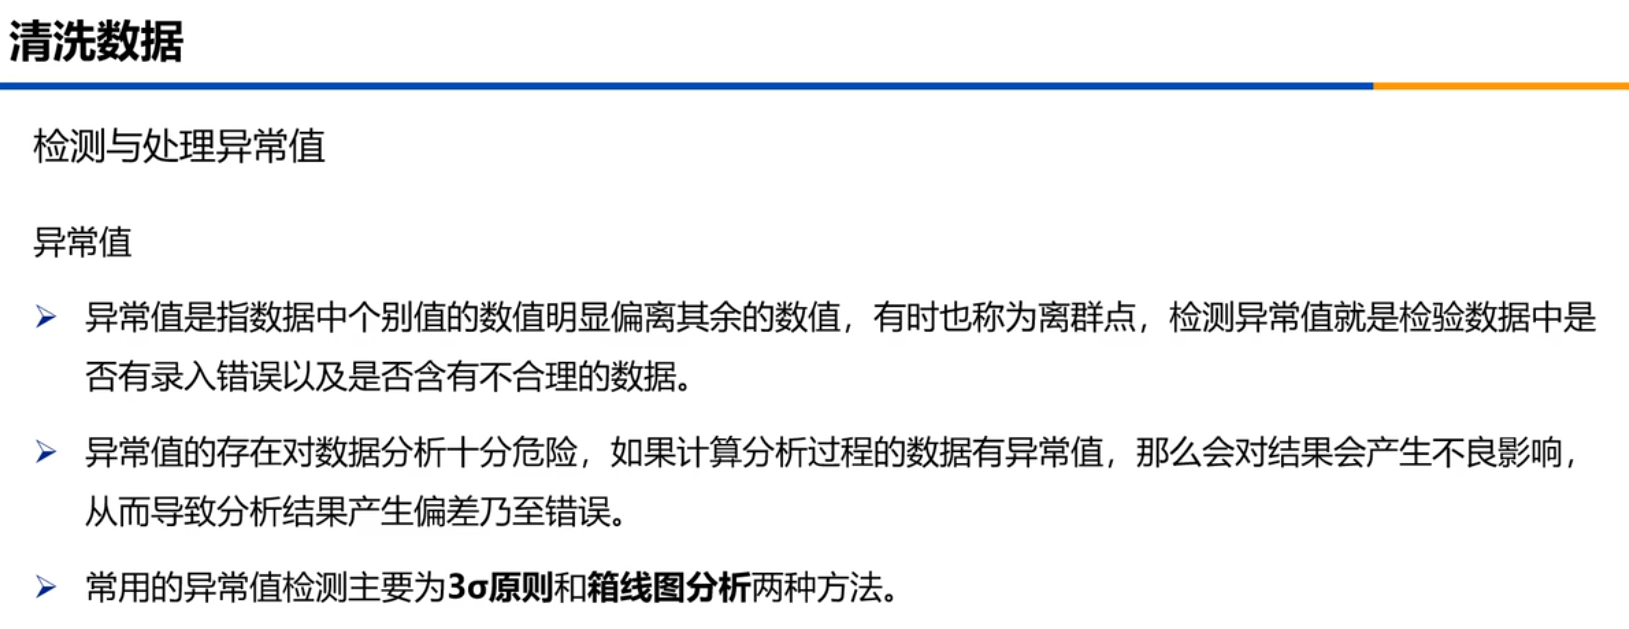

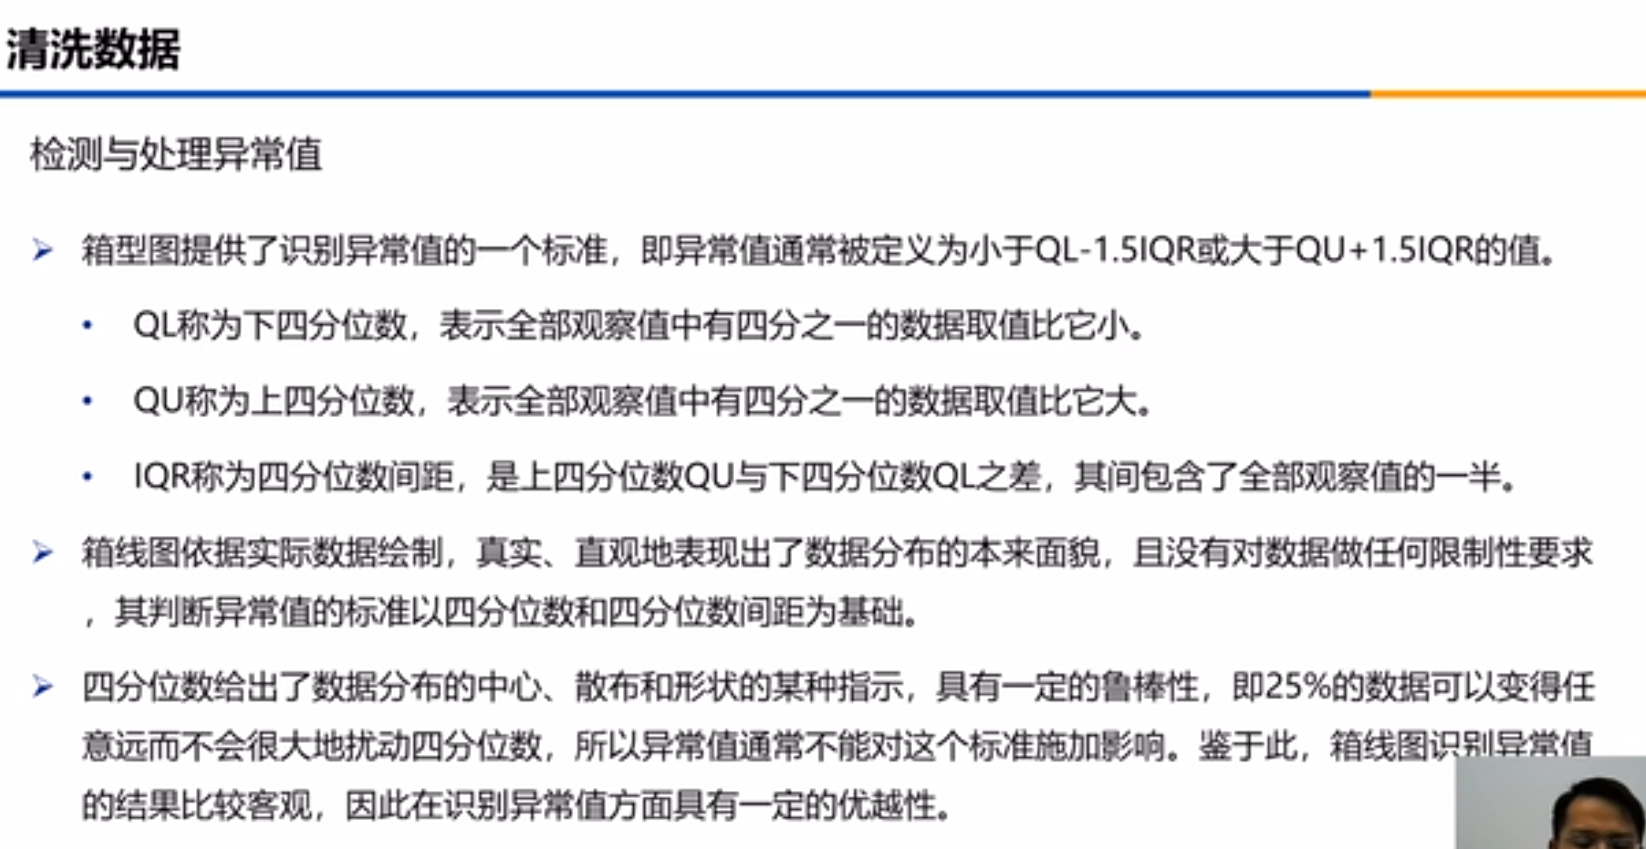

In [59]:
# 将异常值替换为Nan,按缺失值处理
# QU = x.quantile(0.75),上四分位数

## 标准化数据

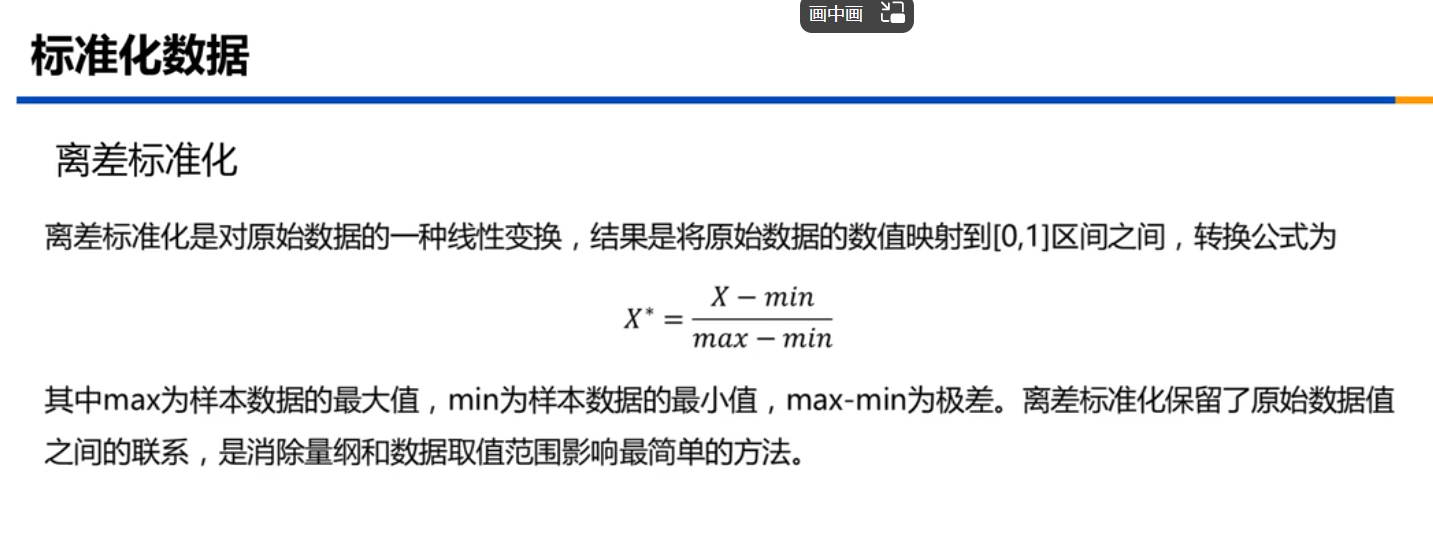

# 哑变量处理

In [7]:
import pandas as pd
data  =  pd.read_excel('temp/meal_order_detail.xlsx')
data.head(3)

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿_x000D_\n_x000D_\n_x000D_\n,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442


In [16]:
pd.get_dummies(data[['amounts','dishes_name']],columns=['amounts'])#默认列为第二个元素

,dishes_name,amounts_1,amounts_5,amounts_6,amounts_7,amounts_8,amounts_9,amounts_10,amounts_13,amounts_15,...,amounts_90,amounts_99,amounts_108,amounts_109,amounts_128,amounts_158,amounts_159,amounts_169,amounts_175,amounts_178
0,蒜蓉生蚝,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,蒙古烤羊腿_x000D_\n_x000D_\n_x000D_\n,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,大蒜苋菜,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,芝麻烤紫菜,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,蒜香包,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,白饭/大碗,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2775,牛尾汤,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2776,意文柠檬汁,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2777,金玉良缘,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 离散化连续型数据

In [17]:
pd.cut(data['amounts'],5)

0        (36.4, 71.8]
1        (36.4, 71.8]
2       (0.823, 36.4]
3       (0.823, 36.4]
4       (0.823, 36.4]
            ...      
2774    (0.823, 36.4]
2775     (36.4, 71.8]
2776    (0.823, 36.4]
2777    (0.823, 36.4]
2778    (0.823, 36.4]
Name: amounts, Length: 2779, dtype: category
Categories (5, interval[float64, right]): [(0.823, 36.4] < (36.4, 71.8] < (71.8, 107.2] < (107.2, 142.6] < (142.6, 178.0]]